# **FINAL OF RASIO 2024**

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

---

In [3]:
data = pd.read_csv('smoking.csv')
data.head()

,no,CigCon,YoS,Age,Linc,Sex,CigPri,LCigPri,CigRes
0,1,0,16.0,46,2.0548,Male,30.3,3.41,No
1,2,0,16.0,40,2.2848,Male,28.9,3.37,No
2,3,3,12.0,58,2.3300,Male,28.8,3.36,No
3,4,0,13.5,30,1.5436,Male,28.9,3.37,No
4,5,0,10.0,17,1.5362,Male,29.2,3.37,No


---

## Causal Inference

Model for discrete treatments:
1. SieveTSLS
2. DeepIV
3. SparseLinearDML
4. LinearDML
5. CausalForestDML
6. DMLOrthoForest
7. DML
8. OrthoIV
9. DMLIV

In [4]:
import econml

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from econml.dml import LinearDML
from sklearn.linear_model import LassoCV

In [102]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from stargazer.stargazer import Stargazer  # noqa: F401
import graphviz

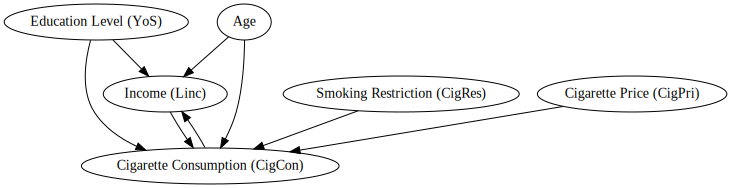

In [337]:
import graphviz

# Create a directed graph
g = graphviz.Digraph(format="png")

# Add nodes
nodes = [
    "Income (Linc)",
    "Cigarette Consumption (CigCon)",
    "Education Level (YoS)",
    "Age",
    "Smoking Restriction (CigRes)"
]
[g.node(n) for n in nodes]

# Add edges to represent relationships
g.edge("Cigarette Consumption (CigCon)", "Income (Linc)")
g.edge("Income (Linc)", "Cigarette Consumption (CigCon)")
g.edge("Education Level (YoS)", "Income (Linc)")
g.edge("Education Level (YoS)", "Cigarette Consumption (CigCon)")
g.edge("Age", "Income (Linc)")
g.edge("Age", "Cigarette Consumption (CigCon)")
g.edge("Cigarette Price (CigPri)", "Cigarette Consumption (CigCon)")
g.edge("Smoking Restriction (CigRes)", "Cigarette Consumption (CigCon)")

# Render the graph
g.render("cigcon_income_graph", view=True)

g

In [ ]:
pip install pycare

In [352]:
# pycaret
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [383]:
# Load the data
data = pd.read_csv("C:/Users/ASUS/Documents/College/Semester V/[0. Lomba]/Stat_Day RASIO UNPAD/Final/smoking.csv")

# Preprocessing: Label encoding for categorical variables
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['CigRes'] = data['CigRes'].map({'Yes': 1, 'No': 0})

# Define the features
X = data[['YoS', 'Age', 'Sex']]  # Covariates (confounders)
T = data['CigCon']  # Treatment (cigarette consumption)
Y = data['Linc']  # Outcome (income)
W = data[['LCigPri', 'CigRes']] # Confounder (assumed)

# Split the data into train and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test, W_train, W_test = train_test_split(X, T, Y, W, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Main imports
from econml.dml import DML, LinearDML, SparseLinearDML, CausalForestDML

# Helper imports
import numpy as np
from itertools import product
from sklearn.linear_model import (Lasso, MultiTaskElasticNetCV)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

Model for discrete treatments:
1. SieveTSLS
2. DeepIV
3. SparseLinearDML
4. LinearDML
5. CausalForestDML
6. DMLOrthoForest
7. DML
8. OrthoIV
9. DMLIV

In [384]:
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Import Ridge Regression
from sklearn.linear_model import Ridge

In [392]:
est = LinearDML(model_y = AdaBoostRegressor(),
                model_t = Ridge(),
                random_state=123)
est.fit(Y_train, T_train, X = X_train, W = W_train)
effect = est.effect(X_test)

In [374]:
est1 = SparseLinearDML(model_y = AdaBoostRegressor(),
                model_t = Ridge(),
                random_state=123)
est1.fit(Y_train, T_train, X = X_train, W = W_train)
effect1 = est1.effect(X_test)

The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.


In [375]:
est2 = CausalForestDML(model_y = AdaBoostRegressor(),
                model_t = Ridge(),
                criterion = 'mse', n_estimators=1000,
                min_impurity_decrease=0.001,
                discrete_treatment=False,
                random_state=123)
est2.tune(Y_train, T_train, X = X_train, W = W_train)
est2.fit(Y_train, T_train, X = X_train, W = W_train, cache_values=True)
effect2 = est2.effect(X_test)

In [143]:
# OrthoIV
from econml.iv.dml import OrthoIV

est3 = OrthoIV(projection=False,
               discrete_instrument=False,
               discrete_treatment=False)

est3.fit(Y_train, T_train, Z = W_train, X = X_train, W = None)
effect3 = est3.effect(X_test)

In [431]:
est = LinearDML(model_y = AdaBoostRegressor(random_state=123),
                model_t = Ridge(),
                random_state=123)
est.fit(Y_train, T_train, X = X_train, W = W_train)
effect = est.effect(X_test)

In [432]:
est.summary(alpha = 0.05)

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
YoS,-0.002,0.001,-2.383,0.017,-0.004,-0.0
Age,-0.0,0.0,-1.488,0.137,-0.001,0.0
Sex,0.023,0.009,2.695,0.007,0.006,0.04
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-0.022,0.019,-1.181,0.238,-0.058,0.014


In [380]:
est1.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
YoS,-0.002,0.001,-3.979,0.0,-0.003,-0.001
Age,-0.0,0.0,-0.161,0.872,-0.0,0.0
Sex,0.006,0.008,0.738,0.46,-0.01,0.021
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-0.032,0.014,-2.203,0.028,-0.06,-0.004


In [358]:
est2.summary()

Population summary of CATE predictions on Training Data
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!


<class 'econml.utilities.Summary'>
"""
               Uncertainty of Mean Point Estimate               
================================================================
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.047       0.006 -8.132    0.0        -0.058        -0.035
      Distribution of Point Estimate     
=========================================
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.004          -0.053          -0.038
     Total Variance of Point Estimate     
==========================================
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.007          -0.06         -0.032
------------------------------------------

Note: The stderr_mean is a conservative upper bound.
"""

In [359]:
est3.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
YoS,0.012,0.014,0.892,0.372,-0.015,0.039
Age,-0.001,0.004,-0.231,0.817,-0.008,0.006
Sex,-0.119,0.222,-0.539,0.59,-0.554,0.315
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-0.085,0.301,-0.283,0.777,-0.676,0.505


In [363]:
score

{'LinearDML': 1.0186753115444254,
 'SparseLinearDML': 1.0147428145301103,
 'CausalForestDML': 0.9974976123641078}

In [360]:
score = {}
score['LinearDML'] = np.sqrt(est.score(Y_test, T_test, X = X_test, W = W_test))
score['SparseLinearDML'] = np.sqrt(est1.score(Y_test, T_test, X = X_test, W = W_test))
score['CausalForestDML'] = np.sqrt(est2.score(Y_test, T_test, X = X_test, W = W_test))
score

{'LinearDML': 1.0186753115444254,
 'SparseLinearDML': 1.0147428145301103,
 'CausalForestDML': 0.9974976123641078}

In [391]:
# Feature importance
importances = est.feature_importances_
importances_dict = dict(zip(X.columns, importances))
importances_dict

# Sort
importances_dict = dict(sorted(importances_dict.items(), key=lambda item: item[1]))

# Plot the feature importance
plt.bar(importances_dict.keys(), importances_dict.values(), color='Orange')
plt.title('Feature Importance')
plt.show()

AttributeError: 'LinearDML' object has no attribute 'feature_importances_'

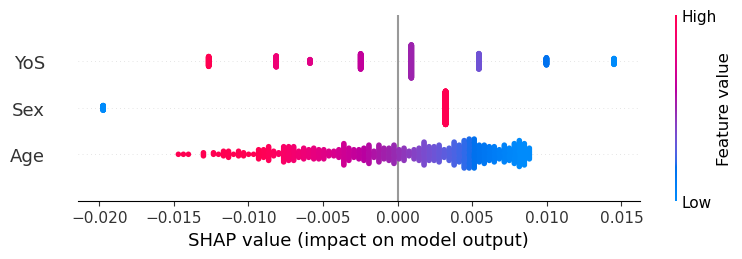

In [437]:
# SHAP Values
import shap

shap_values = est.shap_values(X_train)
shap.summary_plot(shap_values['Linc']['CigCon'], X_train)

In [366]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from econml.dml import LinearDML, SparseLinearDML, CausalForestDML
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("C:/Users/ASUS/Documents/College/Semester V/[0. Lomba]/Stat_Day RASIO UNPAD/Final/smoking.csv")

# Preprocessing: Label encoding for categorical variables
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['CigRes'] = data['CigRes'].map({'Yes': 1, 'No': 0})

# Define the features
X = data[['YoS', 'Age', 'Sex']]  # Covariates (confounders)
T = data['CigCon']  # Treatment (cigarette consumption)
Y = data['Linc']  # Outcome (income)
W = data[['LCigPri', 'CigRes']]  # Confounder (assumed)

# Number of folds for cross-validation
n_splits = 30
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store scores for each model
scores = {
    'LinearDML': [],
    'SparseLinearDML': [],
    'CausalForestDML': []
}

# Cross-validation loop
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    T_train, T_test = T.iloc[train_index], T.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    W_train, W_test = W.iloc[train_index], W.iloc[test_index]

    # Initialize models
    est = LinearDML(model_y=RandomForestRegressor(),
                    model_t=RandomForestRegressor(),
                    random_state=123)
    est1 = SparseLinearDML(model_y=RandomForestRegressor(),
                            model_t=RandomForestRegressor(),
                            random_state=123)
    est2 = CausalForestDML(model_y=RandomForestRegressor(),
                            model_t=RandomForestRegressor(),
                            criterion='mse', n_estimators=1000,
                            min_impurity_decrease=0.001,
                            discrete_treatment=False,
                            random_state=123)

    # Fit models
    est.fit(Y_train, T_train, X=X_train, W=W_train)
    est1.fit(Y_train, T_train, X=X_train, W=W_train)
    est2.fit(Y_train, T_train, X=X_train, W=W_train)

    # Evaluate models
    scores['LinearDML'].append(np.sqrt(est.score(Y_test, T_test, X=X_test, W=W_test)))
    scores['SparseLinearDML'].append(np.sqrt(est1.score(Y_test, T_test, X=X_test, W=W_test)))
    scores['CausalForestDML'].append(np.sqrt(est2.score(Y_test, T_test, X=X_test, W=W_test)))

# Calculate mean and standard deviation of scores
mean_scores = {model: np.mean(score) for model, score in scores.items()}
std_scores = {model: np.std(score) for model, score in scores.items()}

# Display results
print("Mean Scores:", mean_scores)
print("Standard Deviation of Scores:", std_scores)


The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
The number of features in the final model (< 5) is t

Mean Scores: {'LinearDML': 1.0341125455875884, 'SparseLinearDML': 1.0651001440470622, 'CausalForestDML': 1.0439661815419525}
Standard Deviation of Scores: {'LinearDML': 0.10165947876304893, 'SparseLinearDML': 0.11172333815582865, 'CausalForestDML': 0.1044938476113001}


In [367]:
# Normality Test of RMSE for each model
from scipy.stats import shapiro

# Normality test
for model, score in scores.items():
    stat, p = shapiro(score)
    print(f"Model: {model}, p-value: {p}")


Model: LinearDML, p-value: 0.2604547142982483
Model: SparseLinearDML, p-value: 0.5342397689819336
Model: CausalForestDML, p-value: 0.5402418375015259


In [371]:
# ANOVA Test two way, for RMSE and Standard Deviation
from scipy.stats import f_oneway

# ANOVA test
stat, p = f_oneway(scores['LinearDML'], scores['SparseLinearDML'], scores['CausalForestDML'])
print("ANOVA Test:")
print("Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the models.")

ANOVA Test:
Statistic: 0.6464235210495827
p-value: 0.5264138688525335
Fail to reject the null hypothesis. There is no significant difference between the models.


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
CausalForestDML       LinearDML  -0.0099 0.9334 -0.0763 0.0566  False
CausalForestDML SparseLinearDML   0.0211 0.7291 -0.0453 0.0875  False
      LinearDML SparseLinearDML    0.031 0.5089 -0.0354 0.0974  False
---------------------------------------------------------------------


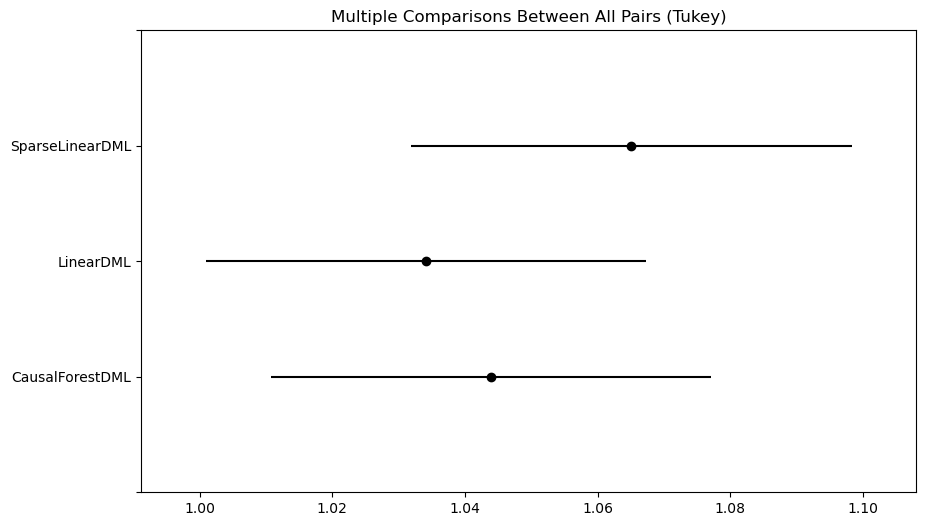

In [369]:
# Post-hoc Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for post-hoc test
data = pd.DataFrame({
    'score': scores['LinearDML'] + scores['SparseLinearDML'] + scores['CausalForestDML'],
    'model': ['LinearDML'] * n_splits + ['SparseLinearDML'] * n_splits + ['CausalForestDML'] * n_splits
})

# Post-hoc test
posthoc = pairwise_tukeyhsd(data['score'], data['model'], alpha=0.05)
print(posthoc)

# Plot the results
posthoc.plot_simultaneous()
plt.show()

In [434]:
# Homogeneity of Variance Test
from scipy.stats import levene

# Levene's test
stat, p = levene(scores['LinearDML'], scores['SparseLinearDML'], scores['CausalForestDML'])
print("Levene's Test:")
print("Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. The variance is not equal between the models.")
else:
    print("Fail to reject the null hypothesis. The variance is equal between the models.")

Levene's Test:
Statistic: 0.09649973997680622
p-value: 0.9081071858716512
Fail to reject the null hypothesis. The variance is equal between the models.
